# Introduction

The maps you create in this course portray the surface of the earth in two dimensions.  But, as you know, the world is actually a three-dimensional globe. So we have to use a method called a **map projection** to render it as a flat surface.  

Map projections can't be 100% accurate.  Each projection distorts the surface of the Earth in some way, while retaining some useful property.  For instance,
- the *equal-area* projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area.  This is a good choice, if you'd like to calculate the area of a country or city, for example.
- the *equidistant* projections (like "Azimuthal Equidistant projection") preserve distance.  This would be a good choice for calculating flight distance.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/noBRRNR.png" width="700">
<b>List of map projections</b> (<a href="https://bit.ly/2kOHTBs">Source</a>)<br/><br/>
</center>

We use a **coordinate reference system (CRS)** to show how the projected points correspond to real locations on Earth.  In this tutorial, you'll learn more about coordinate reference systems, along with how to use them in GeoPandas.

In [1]:

import geopandas as gpd
import pandas as pd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Setting the CRS

When we create a GeoDataFrame from a shapefile, the CRS is already imported for us. 

In [2]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

PROJCS["WGS_1984_UTM_Zone_30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


How do you interpret that?

Coordinate reference systems are referenced by [European Petroleum Survey Group (EPSG)](http://www.epsg.org/) codes.

This GeoDataFrame uses [EPSG 32630](https://epsg.io/32630), which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area. 

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS.  [EPSG 4326](https://epsg.io/4326) corresponds to coordinates in latitude and longitude.

In [3]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("../input/geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In the code cell above, to create a GeoDataFrame from a CSV file, we needed to use both Pandas and GeoPandas:
- We begin by creating a DataFrame containing columns with latitude and longitude coordinates.
- To convert it to a GeoDataFrame, we use `gpd.GeoDataFrame()`.  
- The `gpd.points_from_xy()` function creates `Point` objects from the latitude and longitude columns.

# Re-projecting

Re-projecting refers to the process of changing the CRS.  This is done in GeoPandas with the `to_crs()` method.

When plotting multiple GeoDataFrames, it's important that they all use the same CRS.  In the code cell below, we change the CRS of the `facilities` GeoDataFrame to match the CRS of `regions` before plotting it.

<AxesSubplot:>

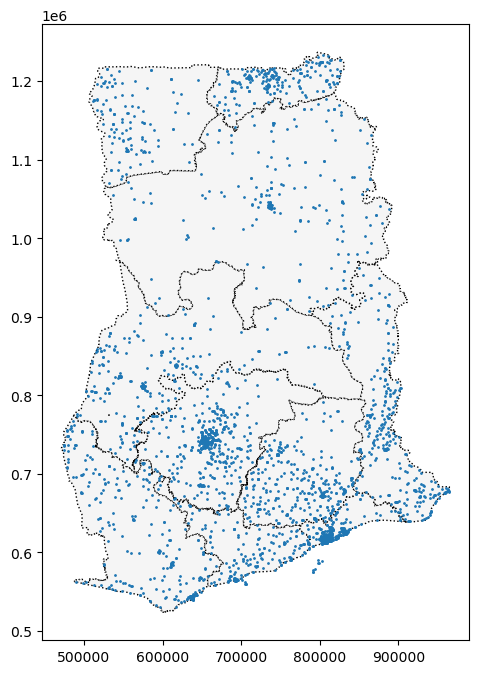

In [4]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

The `to_crs()` method modifies only the "geometry" column: all other columns are left as-is.

In [5]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS.  For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:
```
+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
```

In [6]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


# Attributes of geometric objects

As you learned in the first tutorial, for an arbitrary GeoDataFrame, the type in the "geometry" column depends on what we are trying to show: for instance, we might use:
- a Point for the epicenter of an earthquake, 
- a LineString for a street, or 
- a Polygon to show country boundaries.

All three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset.  For instance, you can get the x- and y-coordinates of a Point from the `x` and `y` attributes, respectively.

In [7]:
# Get the x-coordinate of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

And, you can get the length of a LineString from the `length` attribute.  

Or, you can get the area of a Polygon from the `area` attribute.

In [8]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: PROJCS["WGS_1984_UTM_Zone_30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


In the code cell above, since the CRS of the `regions` GeoDataFrame is set to EPSG 32630 (a "Mercator" projection), the area calculation is slightly less accurate than if we had used an equal-area projection like "Africa Albers Equal Area Conic".

But this yields the area of Ghana as approximately 239585 square kilometers, which is not too far off from [the correct answer](https://www.google.com/search?q=area+of+ghana).

# Your turn

Use what you've learned to **[track bird migration to South America](https://www.kaggle.com/kernels/fork/5832146)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*